In [ ]:
import numpy as np
import pandas as pd
 
 
# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go
 
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
 
#For standardising the dat
from sklearn.preprocessing import StandardScaler
 
#PCA
from sklearn.manifold import TSNE
 
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path="/content/drive/MyDrive/Kannada Mnist/Dataset/full_and_final/kcharMnist.npz"

In [ ]:
with np.load(path) as data:
  train_X = data['x_train']
  train_Y = data['y_train']
  test_X = data['x_test']
  test_Y = data['y_test']

(x_train_full, y_train_full),(x_test,y_test)=(train_X,train_Y),(test_X,test_Y)

In [ ]:
y_train_full = y_train_full.tolist()
for i in range(75408):
  y_train_full[i] =  y_train_full[i]-1

y_train_full = np.array(y_train_full)

y_test = y_test.tolist()
for i in range(5599):
  y_test[i] =  y_test[i]-1

y_test = np.array(y_test)

In [ ]:
shuffler = np.random.permutation(len(x_train_full))
x_train_full = x_train_full[shuffler]
y_train_full = y_train_full[shuffler]

shuffler1 = np.random.permutation(len(x_test))
x_test = x_test[shuffler1]
y_test = y_test[shuffler1]

In [ ]:
from itertools import chain 

In [ ]:
flatten_list_train = []
for i in range(75408):
  flatten_list_train.append(list(chain.from_iterable(x_train_full[i])))

In [ ]:
flatten_list_test = []
for i in range(5599):
  flatten_list_test.append(list(chain.from_iterable(x_test[i])))

In [ ]:
train = list(zip(y_train_full,flatten_list_train))

In [ ]:
x_train_anoop = x_train_full.tolist()
y_train_anoop = y_train_full.tolist()
Y_train_anoop = []
for i in range(75408):
  flatten_list_train.append(list(chain.from_iterable(x_train_anoop[i])))

In [ ]:
new_train_anoop = []
for i in range(75408):
  new_train_anoop.append([y_train_anoop[i]])
  new_train_anoop[i].extend(flatten_list_train[i])

In [ ]:
len(new_train_anoop)

75408

In [ ]:
train = pd.DataFrame(new_train_anoop)

train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,2,255,253,255,255,255,252,255,255,254,255,251,255,254,254,255,255,254,255,255,253,255,254,255,254,255,255,255,255,251,255,251,255,250,255,132,2,1,158,255,...,255,255,252,254,255,255,255,255,252,125,6,253,255,255,255,255,255,255,255,255,255,255,252,255,255,255,252,254,253,255,255,255,254,254,251,255,255,253,252,255
1,9,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,255,255,253,254,255,255,254,255,252,255,255,255,255,255,255,255,255,255,255,255,...,255,255,254,255,250,253,255,134,1,0,0,255,255,255,255,253,255,255,252,255,255,255,255,255,255,255,255,255,254,252,253,255,255,255,255,254,255,255,255,255
2,0,255,255,255,255,255,254,255,255,255,253,255,254,254,255,255,254,255,254,255,254,255,255,252,255,254,255,255,253,255,252,255,254,254,254,254,198,163,5,0,...,0,2,23,245,254,254,255,255,254,255,255,255,255,254,255,252,255,254,255,255,254,254,255,255,255,255,255,255,255,255,254,254,255,252,253,255,255,255,255,255
3,5,255,255,255,254,255,252,255,255,255,254,255,255,255,254,255,255,255,253,255,254,253,255,255,254,255,255,255,255,255,255,254,253,255,255,172,170,0,0,172,...,253,255,172,175,0,0,0,2,174,253,255,254,254,255,255,255,251,254,255,254,255,255,255,253,254,254,250,255,255,255,255,254,255,255,253,255,253,255,253,254
4,5,255,255,255,255,255,255,255,255,255,253,254,255,251,255,255,255,255,254,255,255,253,252,255,253,255,255,255,255,255,255,255,255,255,255,255,255,255,253,252,...,253,253,255,254,253,254,255,254,255,255,255,255,255,254,255,250,255,253,253,253,255,254,255,243,255,252,255,255,255,255,255,249,255,249,254,253,255,255,255,255


In [ ]:
flatten_list_test = []
for i in range(5599):
  flatten_list_test.append(list(chain.from_iterable(x_test[i])))

In [ ]:
test = list(zip(y_test,flatten_list_test))

In [ ]:
x_test_anoop = x_test.tolist()
y_test_anoop = y_test.tolist()
Y_test_anoop = []
for i in range(5599):
  flatten_list_test.append(list(chain.from_iterable(x_test_anoop[i])))

In [ ]:
new_test_anoop = []
for i in range(5599):
  new_test_anoop.append([y_test_anoop[i]])
  new_test_anoop[i].extend(flatten_list_test[i])

In [ ]:
len(new_test_anoop)

5599

In [ ]:
test = pd.DataFrame(new_test_anoop)

test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,1,254,254,255,255,252,255,255,255,253,255,255,255,255,253,255,253,254,255,255,255,255,255,255,253,252,255,255,253,255,255,252,254,255,254,253,253,255,254,255,...,1,0,0,30,63,254,253,255,255,255,254,255,255,251,255,255,255,251,255,255,255,255,253,255,255,255,255,255,255,254,255,254,255,255,253,255,255,255,254,255
1,7,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,255,255,255,255,255,255,255,255,255,255,255,255,...,1,0,2,50,252,253,255,253,254,255,255,255,255,255,255,255,255,255,255,255,254,253,255,254,254,253,255,255,254,255,255,254,255,253,255,255,255,255,255,255
2,11,255,255,255,255,255,255,255,255,255,255,255,253,255,255,253,255,255,255,255,253,255,255,255,254,254,255,255,254,255,255,255,255,255,255,255,255,255,255,254,...,252,255,141,0,3,4,107,135,255,255,255,255,255,255,255,255,255,253,255,252,254,255,255,255,255,252,255,255,254,252,255,255,254,255,253,255,253,255,255,255
3,7,255,255,255,255,255,255,255,255,255,255,252,255,255,255,255,255,255,253,254,255,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,251,255,255,...,0,0,11,46,255,255,254,254,255,255,255,255,255,255,255,255,255,255,255,255,254,255,254,255,252,255,255,255,255,255,254,254,255,251,255,255,255,255,255,255
4,11,255,255,255,255,255,255,255,255,255,255,255,254,255,255,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,253,255,255,250,255,252,255,255,255,254,254,255,254,255,255,251,251,253,255,255,255,251,255,255,255,253,254,254,255,255,253,255,255,255,255,255,252,255,255


In [ ]:
y = train.loc[:,0].values
x = train.loc[:,1:].values

print(x.shape)
print(y)

(75408, 784)
[2 9 0 ... 8 5 9]


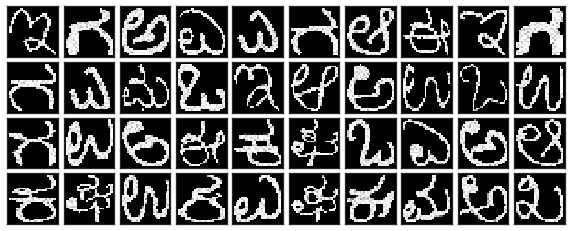

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [ ]:
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(75408, 784)


In [ ]:
x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=10000).fit_transform(x_subset)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


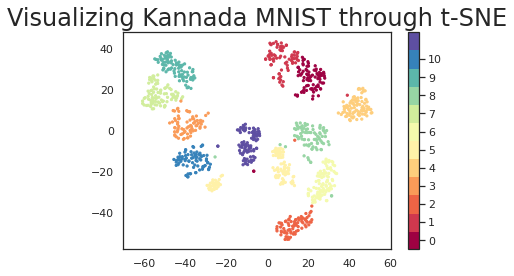

In [ ]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(13)-0.5).set_ticks(np.arange(11))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

# USING PCA

In [ ]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [ ]:
%time
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


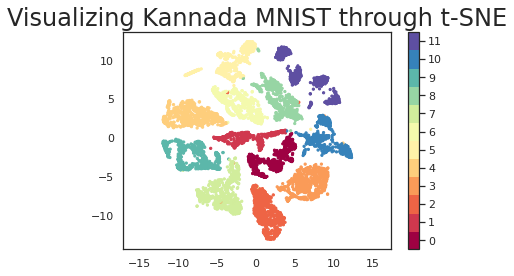

In [ ]:
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(13)-0.5).set_ticks(np.arange(12))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

# 3D plots

In [ ]:
%time
pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


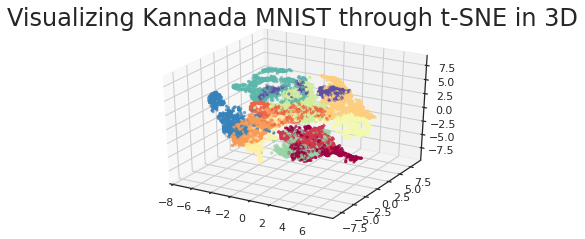

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y_subset, cmap='Spectral')
plt.title('Visualizing Kannada MNIST through t-SNE in 3D', fontsize=24);
plt.show()

In [ ]:
x=pca_tsne2[:, 0]
y=pca_tsne2[:, 1]
z=pca_tsne2[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=x,                # set color to an array/list of desired values
        colorscale='Spectral',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()